In [142]:
import matplotlib.pyplot as plt
import numpy as np
import re

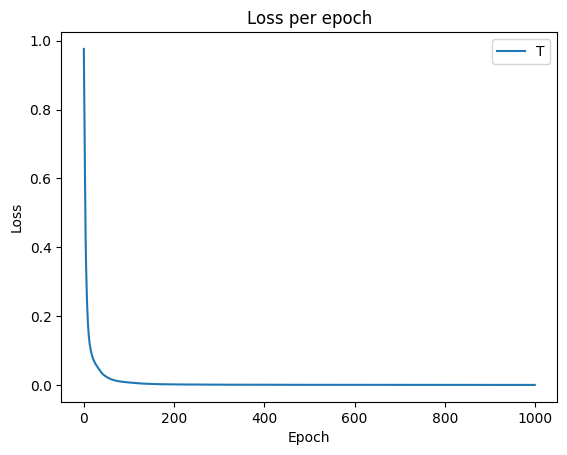

In [158]:
# Plot loss per epoch

# Define regular expression to match
image_pattern = r'loss_per_epoch: \[(.*?)\]'

# Assumming in same location
file_path = 'training_statistics.txt'

# Array to hold data for visualisation
loss_per_epoch = []

# Open file and extract data
with open(file_path, 'r') as file:
    text = file.read()

    # Get all pattern matches
    data = re.findall(image_pattern, text, re.DOTALL)
    loss_per_epoch = data[0].split(',')
    loss_per_epoch = [float(loss.strip()) for loss in loss_per_epoch]
    loss_per_epoch = np.array(loss_per_epoch, dtype=np.float32)

# Plot graph
plt.plot(loss_per_epoch)
plt.title("Loss per epoch")
plt.legend("Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [144]:
# Plot image, actual and prediction values

# Define regex pattern to get the image array, actual and predicted values
image_pattern = r'image: \[(.*?)\]'
actual_pattern = r'actual:\s*(\d+)'
predicted_pattern = r'actual:\s*(\d+)'

# Filepath assuming in the same directory
file_path = 'test_output.txt'

# Array to hold data for visualisation
visualisation_data = []

# Open file and extract data
with open(file_path, 'r') as file:
    text = file.read()

    # Get all pattern matches
    image_matches = re.findall(image_pattern, text, re.DOTALL)
    actual_matches = re.findall(actual_pattern, text, re.DOTALL)
    predicted_matches = re.findall(predicted_pattern, text, re.DOTALL)

    # Go through each of the matches and append output array
    for i in range(len(image_matches)):
      str_img = image_matches[i].split(',')
      img = [float(num_str.strip()) for num_str in str_img]
      img = np.array(img, dtype=np.float32)
      img = img.astype(np.float32)
      img = img.reshape((8,8))
      visualisation_data.append((img, predicted_matches[i], actual_matches[i]))

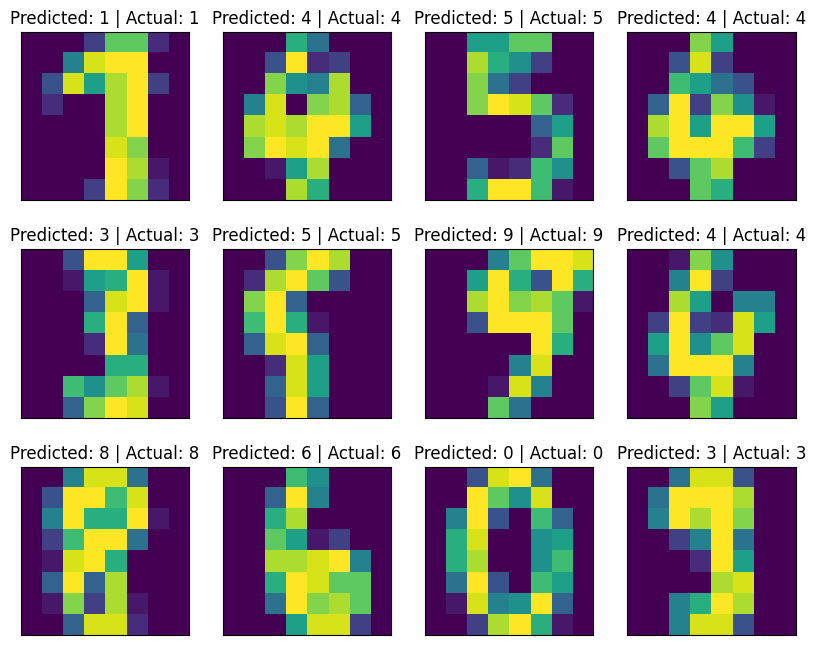

In [163]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize=(10,8))

for i, ax in enumerate(axes.flat): # Flattern axes into 1d and get id
  ax.imshow(visualisation_data[i][0])
  ax.set_title(f"Predicted: {visualisation_data[i][1]} | Actual: {visualisation_data[i][2]}")
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()